# Apple Stock Data

This data is from apple stock from January 1st 2009 to December 31st 2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from copy import deepcopy as copy

In [2]:
# Load data
df = pd.read_csv("AAPL.csv")

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-12-31,12.281428,12.534286,12.191428,12.192857,10.583897,151885300
1,2009-01-02,12.268572,13.005714,12.165714,12.964286,11.253528,186503800
2,2009-01-05,13.310000,13.740000,13.244286,13.511429,11.728474,295402100
3,2009-01-06,13.707143,13.881429,13.198571,13.288571,11.535025,322327600
4,2009-01-07,13.115714,13.214286,12.894286,13.001429,11.285772,188262200
...,...,...,...,...,...,...,...
2764,2019-12-24,284.690002,284.890015,282.920013,284.269989,283.596924,12119700
2765,2019-12-26,284.820007,289.980011,284.700012,289.910004,289.223602,23280300
2766,2019-12-27,291.119995,293.970001,288.119995,289.799988,289.113831,36566500
2767,2019-12-30,289.459991,292.690002,285.220001,291.519989,290.829773,36028600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 7 columns):
Date         2769 non-null object
Open         2769 non-null float64
High         2769 non-null float64
Low          2769 non-null float64
Close        2769 non-null float64
Adj Close    2769 non-null float64
Volume       2769 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 151.6+ KB


In [23]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2.769000e+03
mean,102.150200,103.064599,101.220505,102.176330,95.990242,8.104350e+07
std,59.374488,59.883902,58.928612,59.445937,60.112070,6.146245e+07
min,11.341429,11.714286,11.171429,11.171429,9.697256,1.136200e+07
25%,55.377144,55.877144,54.605713,55.327145,48.026226,3.256000e+07
50%,94.639999,95.550003,93.629997,94.480003,86.021584,6.369020e+07
75%,141.600006,142.380005,140.869995,141.630005,135.558868,1.117956e+08
max,291.119995,293.970001,289.519989,293.649994,292.954712,4.702495e+08


## Data Visualization & Preprocessing

In [5]:
# Check for any missing values
np.any(df.isnull())

False

In [52]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-12-31,12.281428,12.534286,12.191428,12.192857,10.583897,151885300
1,2009-01-02,12.268572,13.005714,12.165714,12.964286,11.253528,186503800
2,2009-01-05,13.310000,13.740000,13.244286,13.511429,11.728474,295402100
3,2009-01-06,13.707143,13.881429,13.198571,13.288571,11.535025,322327600
4,2009-01-07,13.115714,13.214286,12.894286,13.001429,11.285772,188262200
...,...,...,...,...,...,...,...
2764,2019-12-24,284.690002,284.890015,282.920013,284.269989,283.596924,12119700
2765,2019-12-26,284.820007,289.980011,284.700012,289.910004,289.223602,23280300
2766,2019-12-27,291.119995,293.970001,288.119995,289.799988,289.113831,36566500
2767,2019-12-30,289.459991,292.690002,285.220001,291.519989,290.829773,36028600


In [8]:
T = df[['Close']].copy()
T

,Close
0,12.192857
1,12.964286
2,13.511429
3,13.288571
4,13.001429
...,...
2764,284.269989
2765,289.910004
2766,289.799988
2767,291.519989


In [38]:
X1 = df.iloc[:, :-3].copy()
X2 = df.iloc[:, -2:].copy()
X = pd.concat([X1, X2], axis=1)
X

,Date,Open,High,Low,Adj Close,Volume
0,2008-12-31,12.281428,12.534286,12.191428,10.583897,151885300
1,2009-01-02,12.268572,13.005714,12.165714,11.253528,186503800
2,2009-01-05,13.310000,13.740000,13.244286,11.728474,295402100
3,2009-01-06,13.707143,13.881429,13.198571,11.535025,322327600
4,2009-01-07,13.115714,13.214286,12.894286,11.285772,188262200
...,...,...,...,...,...,...
2764,2019-12-24,284.690002,284.890015,282.920013,283.596924,12119700
2765,2019-12-26,284.820007,289.980011,284.700012,289.223602,23280300
2766,2019-12-27,291.119995,293.970001,288.119995,289.113831,36566500
2767,2019-12-30,289.459991,292.690002,285.220001,290.829773,36028600


In [50]:
X['Date'] = X['Date'].str.replace("-","").astype(int)
X

,Date,Open,High,Low,Adj Close,Volume
0,20081231,12.281428,12.534286,12.191428,10.583897,151885300
1,20090102,12.268572,13.005714,12.165714,11.253528,186503800
2,20090105,13.310000,13.740000,13.244286,11.728474,295402100
3,20090106,13.707143,13.881429,13.198571,11.535025,322327600
4,20090107,13.115714,13.214286,12.894286,11.285772,188262200
...,...,...,...,...,...,...
2764,20191224,284.690002,284.890015,282.920013,283.596924,12119700
2765,20191226,284.820007,289.980011,284.700012,289.223602,23280300
2766,20191227,291.119995,293.970001,288.119995,289.113831,36566500
2767,20191230,289.459991,292.690002,285.220001,290.829773,36028600


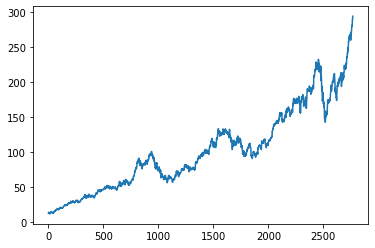

In [56]:
plt.plot(df.loc[:, 'Close'])

(array([431., 496., 497., 504., 219., 283., 186., 103.,  26.,  24.]),
 array([ 11.171429 ,  39.4192855,  67.667142 ,  95.9149985, 124.162855 ,
        152.4107115, 180.658568 , 208.9064245, 237.154281 , 265.4021375,
        293.649994 ]),
 <a list of 10 Patch objects>)

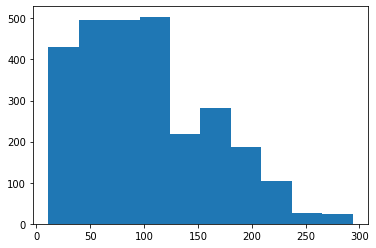

In [21]:
plt.hist(df.loc[:, 'Close'])

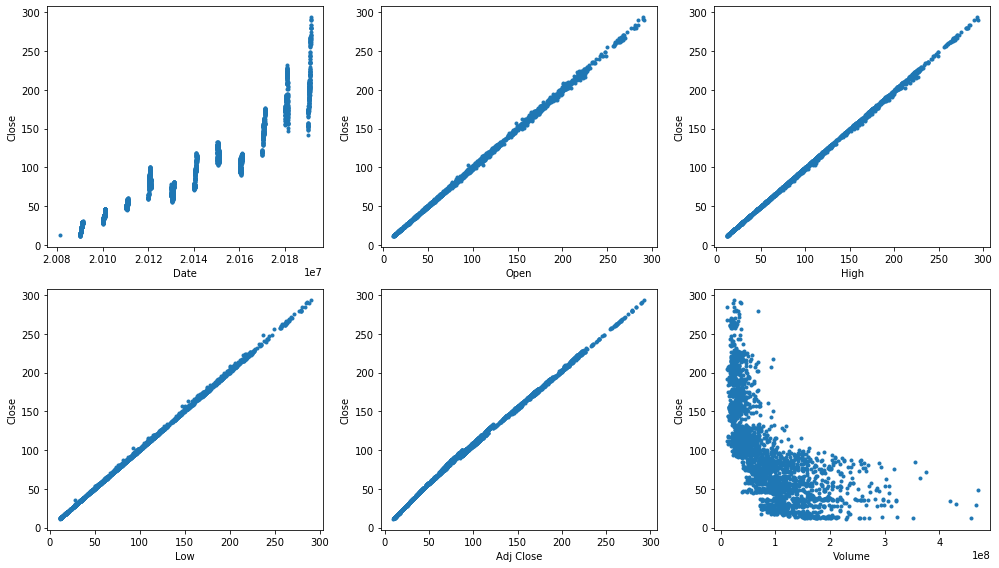

In [55]:
# Plot for each feature vs Class
fig = plt.figure(figsize=(14,8))
plt.clf()
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.plot(X.iloc[:, i], T, '.')
    plt.xlabel(X.columns.values[i])
    plt.ylabel('Close')
fig.tight_layout()